In [3]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_files
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import bz2

In [5]:
# Load the E2006-tfidf dataset
X_train, y_train, X_test, y_test = load_svmlight_files(('E2006.train', 'E2006.test'))   # Adjust path as needed
num_samples = X_train.shape[0] #should be 16087
print(num_samples)

16087


In [7]:
# Initialize Ridge and Lasso models
# You may want to increase max_iter for Lasso model to guarantee convergence
lamda = 0.1
### YOUR CODE HERE
ridge_model=Ridge(alpha=lamda)
lasso_model=Lasso(alpha=lamda/num_samples)
### YOUR CODE HERE


In [9]:
# Train the Ridge and Lasso model
### YOUR CODE HERE
ridge_model.fit(X_train,y_train)
lasso_model.fit(X_train,y_train)
### YOUR CODE HERE
#Reporting the number of non-zero coefficients for lamda=0.1
c_ridge=sum(x!=0 for x in ridge_model.coef_)
c_lasso=sum(x!=0 for x in lasso_model.coef_)
print(c_ridge,c_lasso)

150348 102


In [49]:
# Make prediction with both models
ridge_predictions_train = ridge_model.predict(X_train)
lasso_predictions_train = lasso_model.predict(X_train)
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)



In [55]:
# Evaluate models using Root Mean Squared Error
# To compute RMSE, you can use the function "mean_squared_error" by setting 'squared=False'
### YOUR CODE HERE
rmse_ridge=mean_squared_error(y_test,ridge_predictions, squared=False)
rmse_lasso=mean_squared_error(y_test,lasso_predictions, squared=False)
print(rmse_ridge, rmse_lasso)
### YOUR CODE HERE

0.37143516965747786 0.36866048420636605


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [55]:
# Print result and Plot curve
### YOUR CODE HERE
# Note: You can use matplotlib to plot curve
lamda_values=[0, 1e-5, 1e-3, 1e-2, 0.1, 1, 10, 100, 1e3, 1e4, 1e5, 1e6]
rmse_ridge_train=[]
rmse_ridge_test=[]
rmse_lasso_train=[]
rmse_lasso_test=[]
c2_ridge=[]
c2_lasso=[]
ridge_norms=[]
lasso_norms=[]
for lamda in lamda_values:
    ridge_model=Ridge(alpha=lamda)
    lasso_model=Lasso(alpha=lamda/num_samples)
    ridge_model.fit(X_train,y_train)
    lasso_model.fit(X_train,y_train)
    c2_ridge.append(sum(x!=0 for x in ridge_model.coef_))
    c2_lasso.append(sum(x!=0 for x in lasso_model.coef_))
    ridge_norms.append(sum(ridge_model.coef_ ** 2)) 
    lasso_norms.append(sum(lasso_model.coef_ ** 2))
    ridge_predictions_train = ridge_model.predict(X_train)
    rmse_ridge_train.append(mean_squared_error(y_train,ridge_predictions_train, squared=False))
    lasso_predictions_train = lasso_model.predict(X_train)
    rmse_lasso_train.append(mean_squared_error(y_train,lasso_predictions_train, squared=False))
    ridge_predictions_test = ridge_model.predict(X_test)
    rmse_ridge_test.append(mean_squared_error(y_test,ridge_predictions_test, squared=False))
    lasso_predictions_test = lasso_model.predict(X_test)
    rmse_lasso_test.append(mean_squared_error(y_test,lasso_predictions_test, squared=False))\
### YOUR CODE HERE

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared

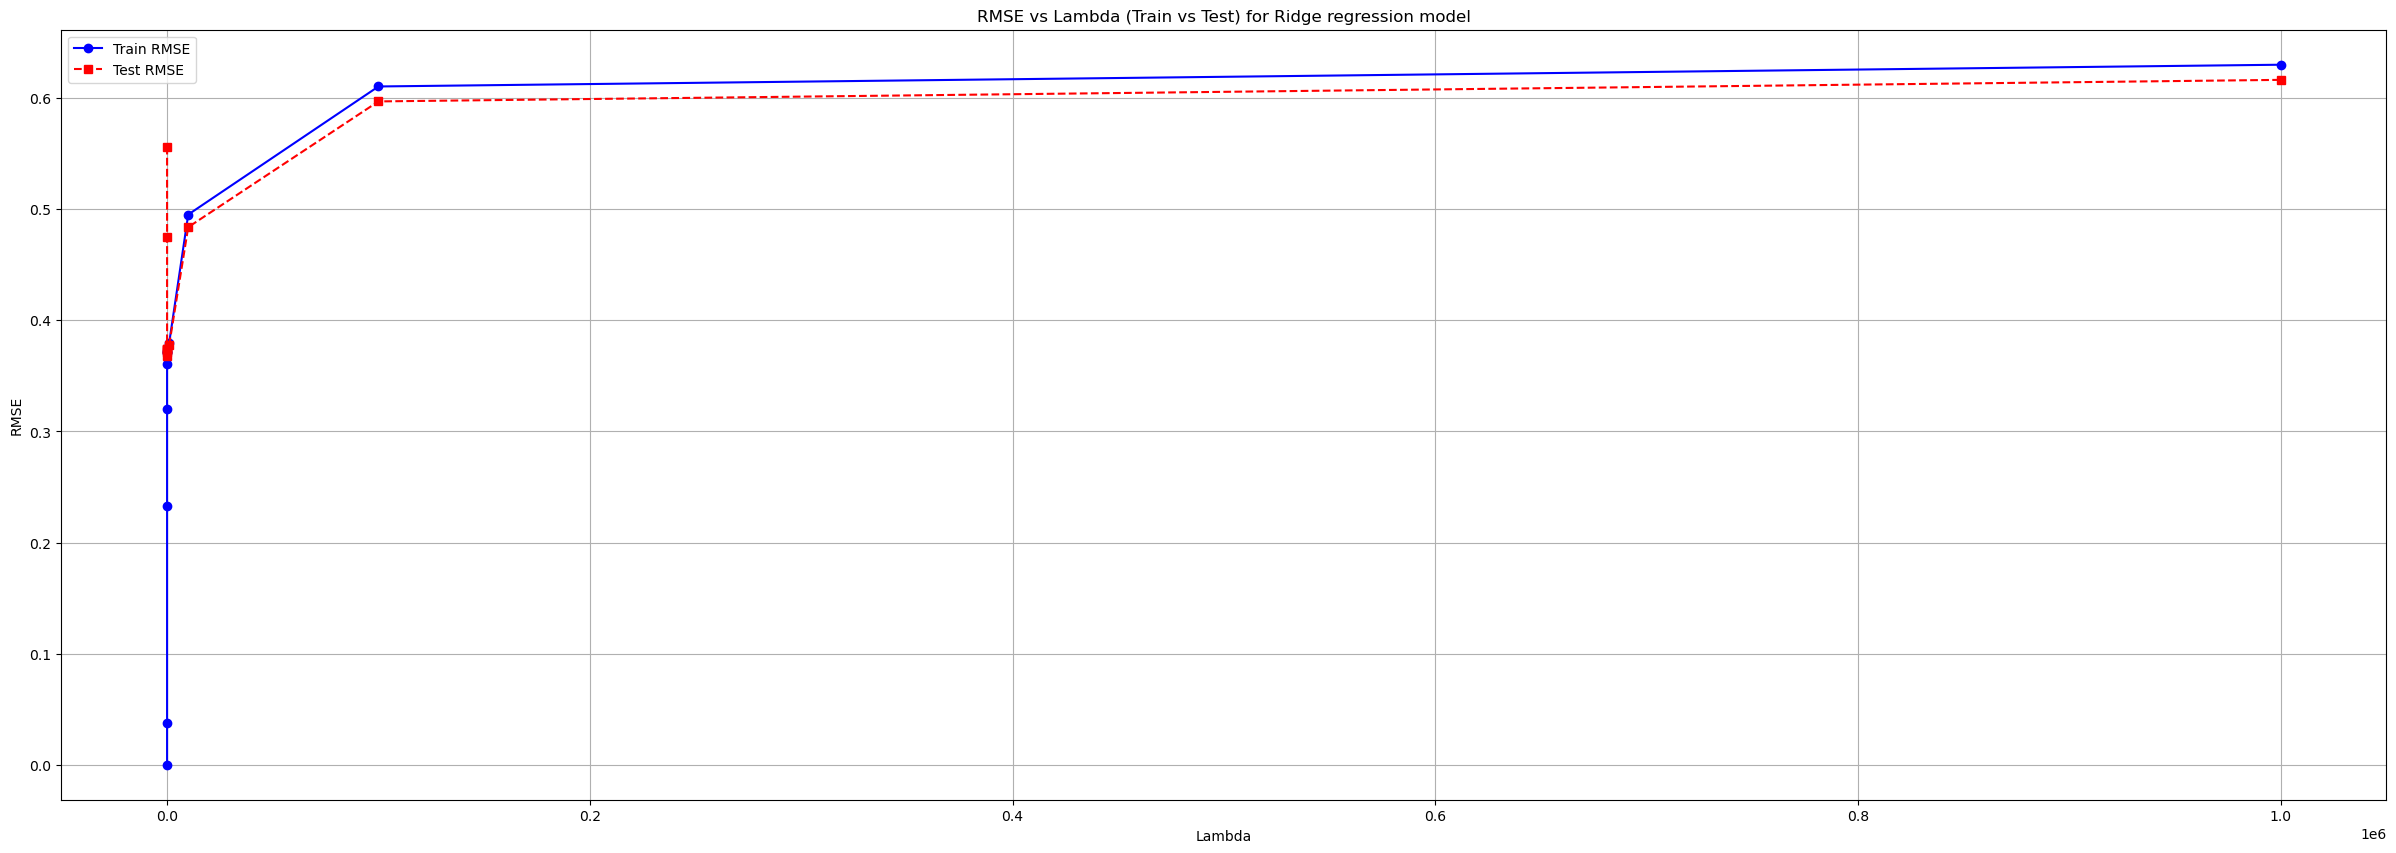

In [57]:
plt.figure(figsize=(30, 10))
plt.plot(lamda_values, rmse_ridge_train, marker='o', linestyle='-', color='b', label='Train RMSE')
plt.plot(lamda_values, rmse_ridge_test, marker='s', linestyle='--', color='r', label='Test RMSE')

plt.title('RMSE vs Lambda (Train vs Test) for Ridge regression model')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.legend()

plt.grid(True)

plt.show()

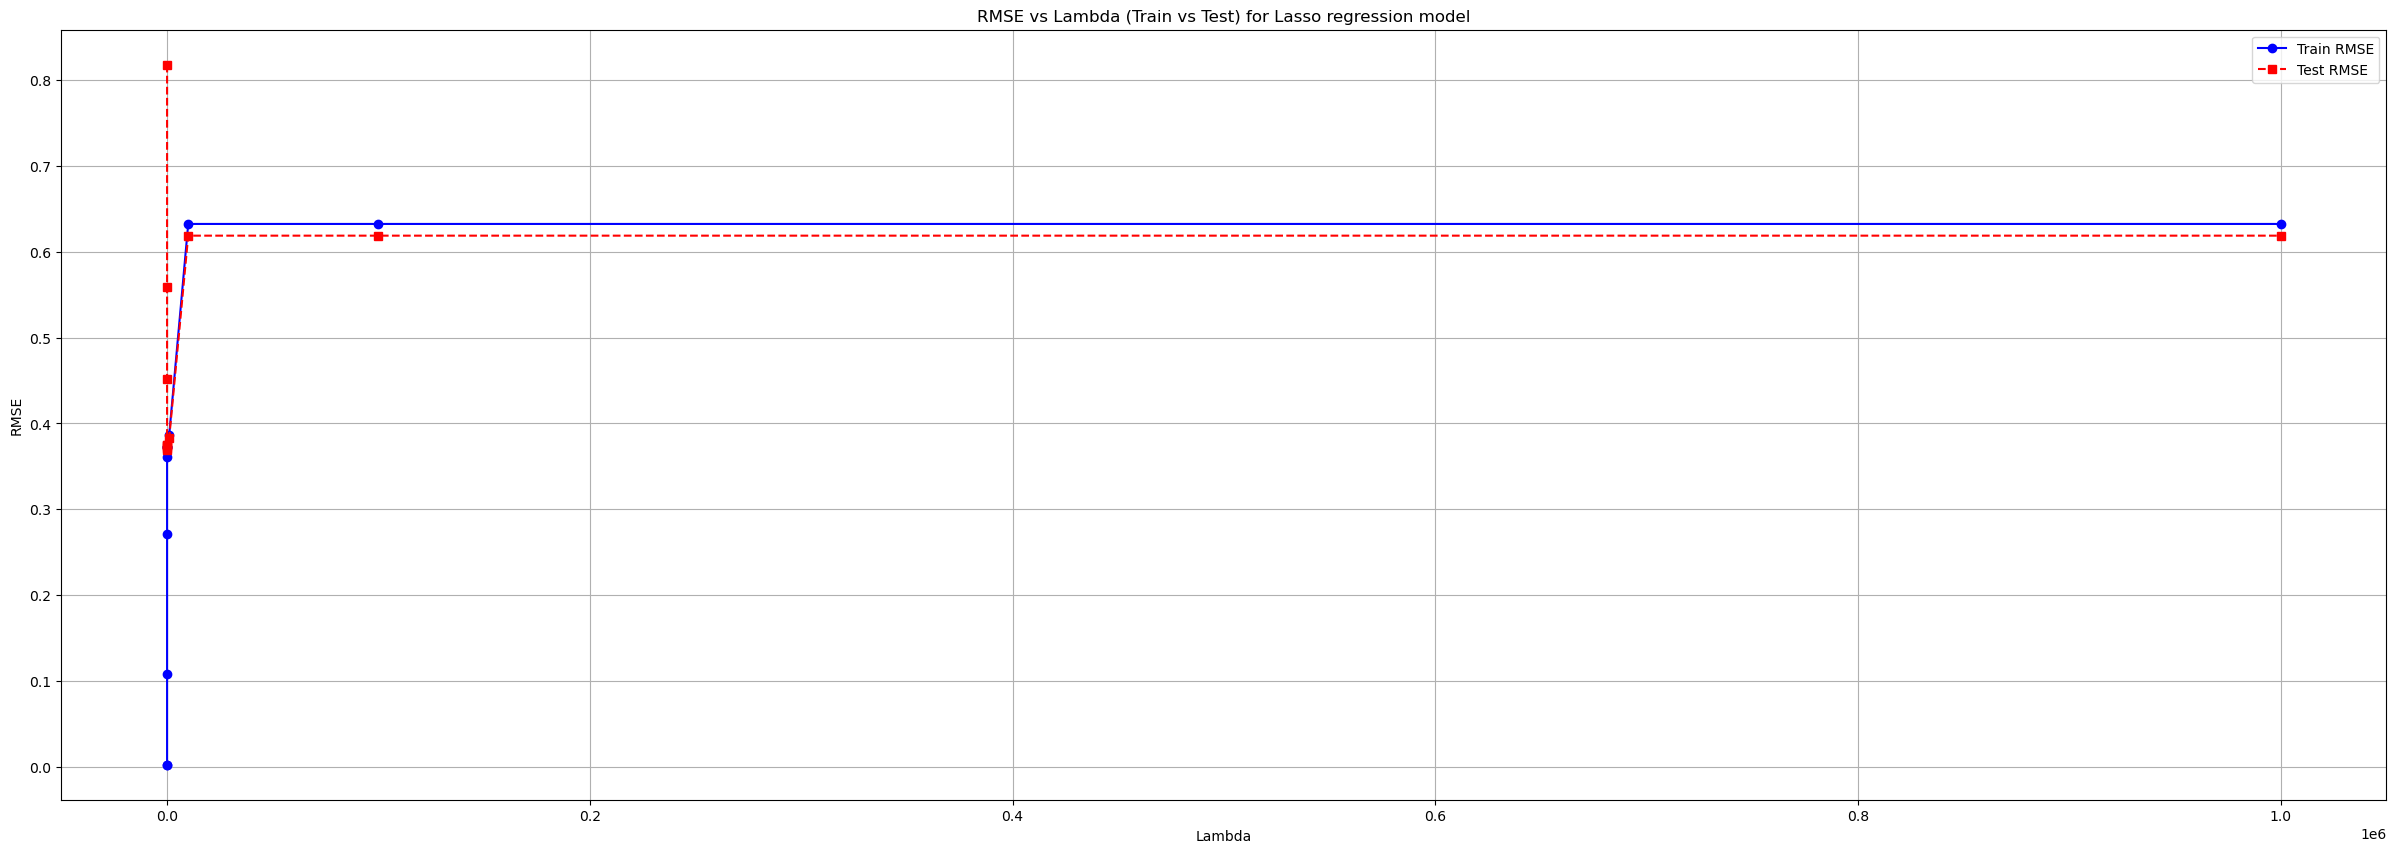

In [69]:
plt.figure(figsize=(30, 10))
plt.plot(lamda_values, rmse_lasso_train, marker='o', linestyle='-', color='b', label='Train RMSE')
plt.plot(lamda_values, rmse_lasso_test, marker='s', linestyle='--', color='r', label='Test RMSE')
plt.title('RMSE vs Lambda (Train vs Test) for Lasso regression model')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
import pandas as pd
loss_table=pd.DataFrame({
    'Lamda': lamda_values,
    'Ridge test RMSE':rmse_ridge_test,
    'Lasso test RMSE':rmse_lasso_test,
})
print(loss_table)

            Lamda  Ridge test RMSE  Lasso test RMSE
0         0.00000         0.556146         0.817661
1         0.00001         0.474723         0.559345
2         0.00100         0.373593         0.452063
3         0.01000         0.368041         0.371522
4         0.10000         0.371435         0.368660
5         1.00000         0.373849         0.374510
6        10.00000         0.374381         0.374455
7       100.00000         0.374087         0.374044
8      1000.00000         0.377959         0.383117
9     10000.00000         0.483801         0.618640
10   100000.00000         0.596943         0.618640
11  1000000.00000         0.616339         0.618640


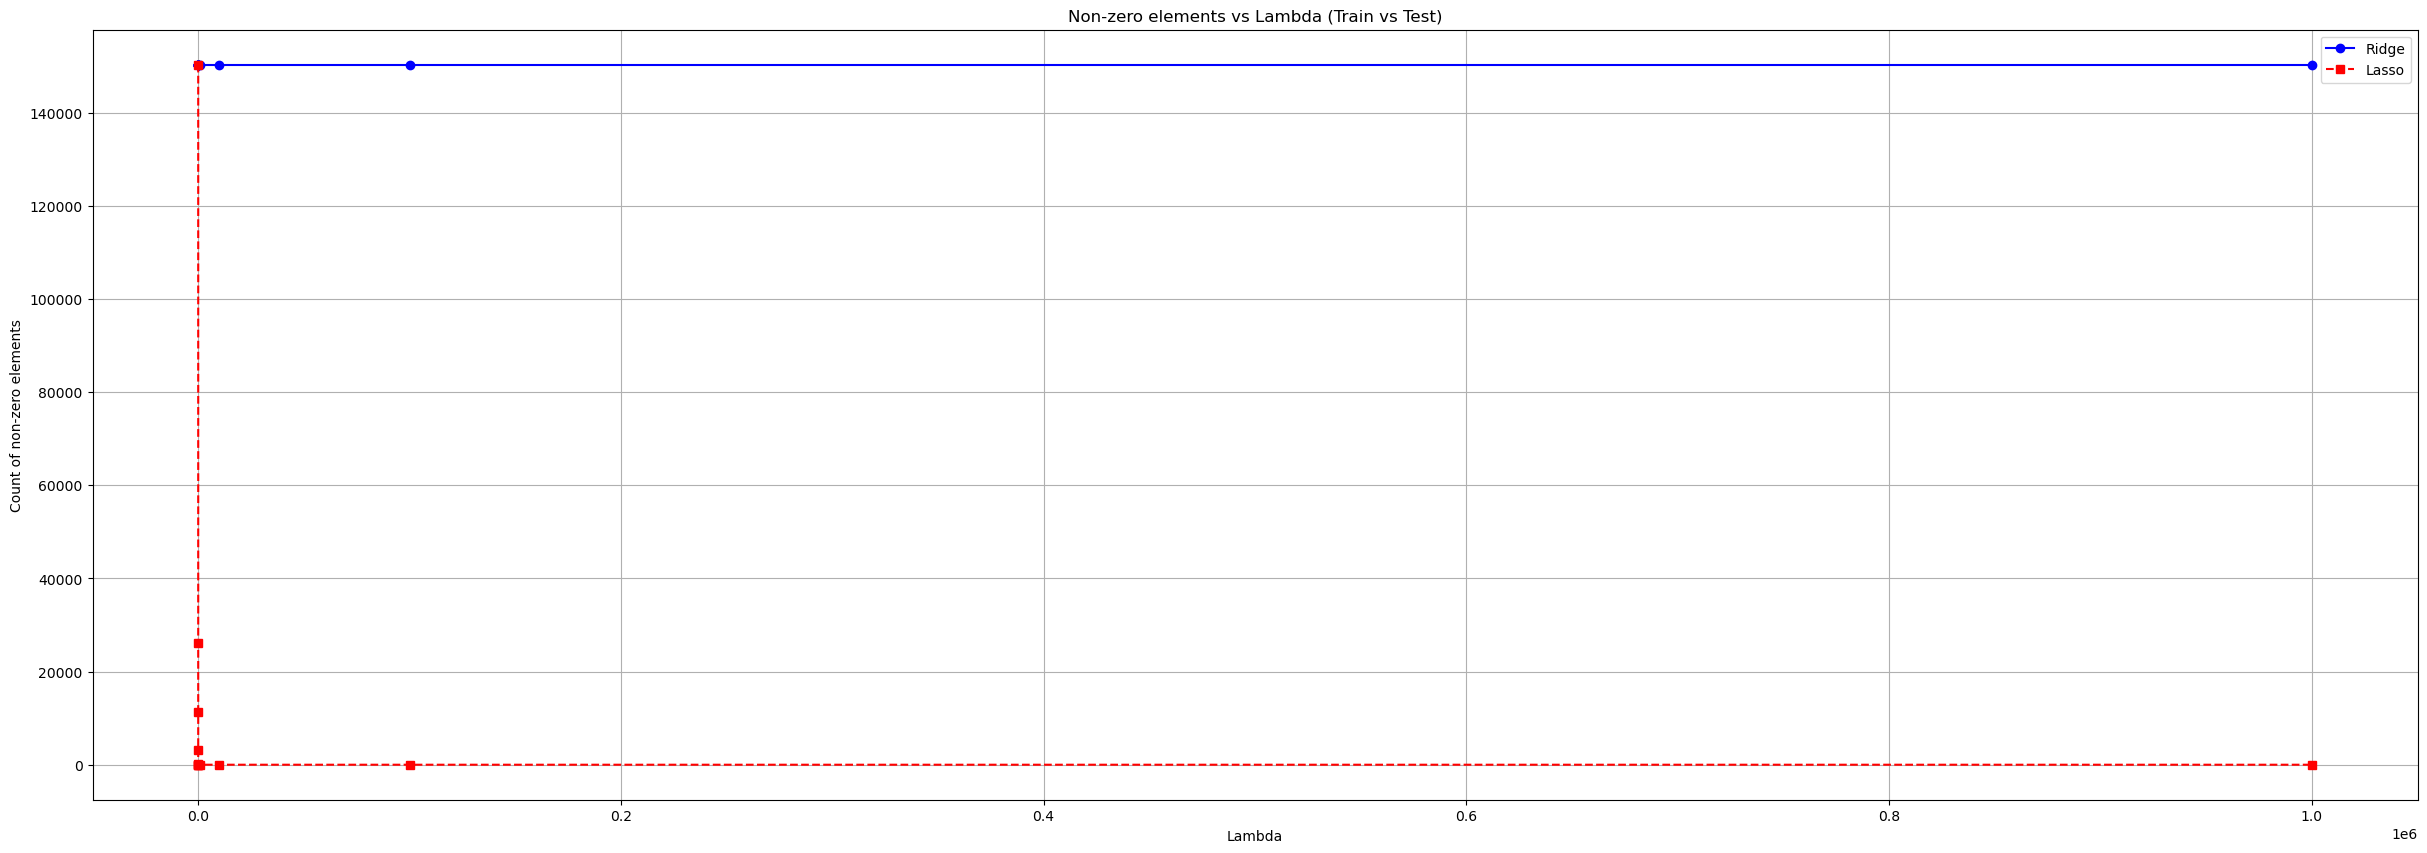

In [85]:
plt.figure(figsize=(30, 10))
plt.plot(lamda_values, c2_ridge, marker='o', linestyle='-', color='b', label='Ridge')

plt.plot(lamda_values, c2_lasso, marker='s', linestyle='--', color='r', label='Lasso')

plt.title('Non-zero elements vs Lambda (Train vs Test)')
plt.xlabel('Lambda')
plt.ylabel('Count of non-zero elements')
plt.legend()

plt.grid(True)

plt.show()

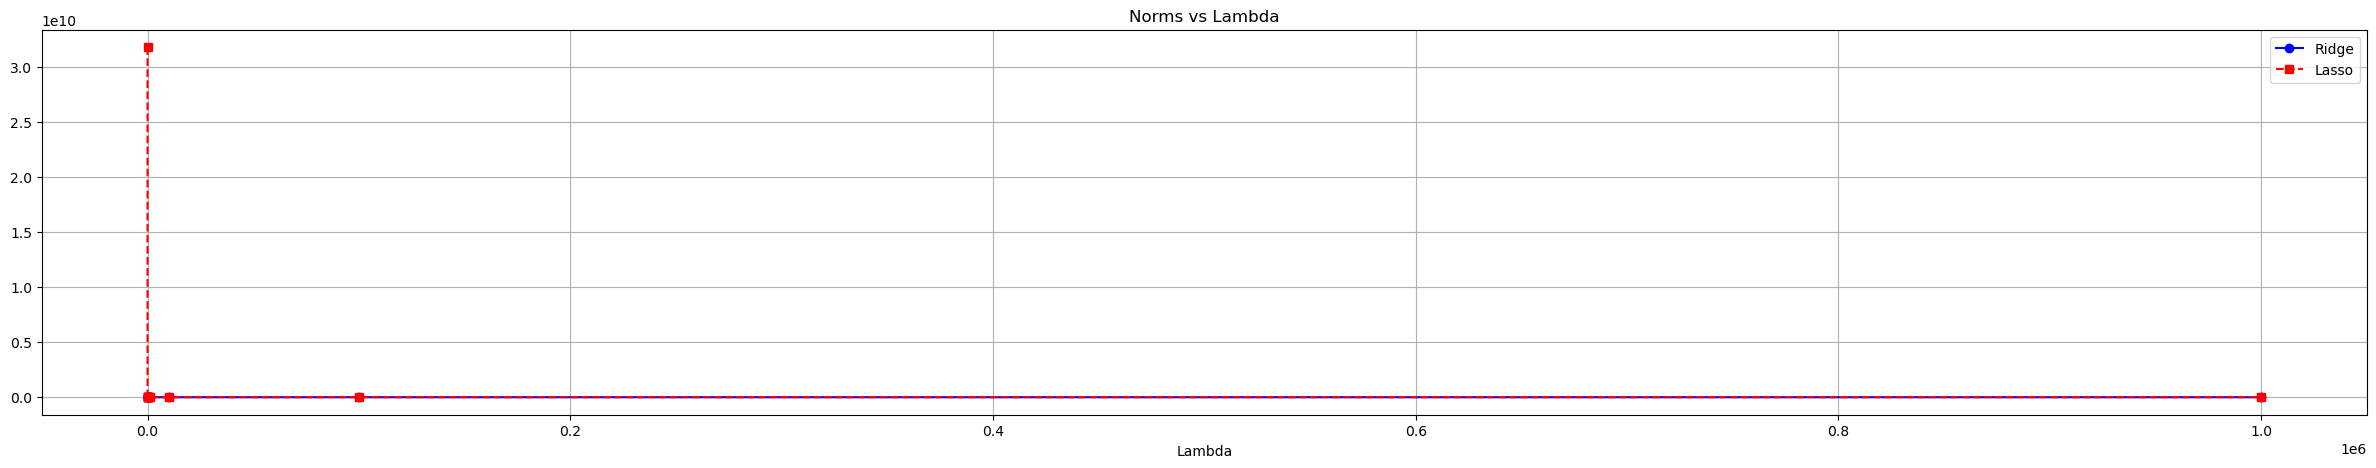

In [95]:
plt.figure(figsize=(30, 5))

plt.plot(lamda_values, ridge_norms, marker='o', linestyle='-', color='b', label='Ridge')

plt.plot(lamda_values, lasso_norms, marker='s', linestyle='--', color='r', label='Lasso')

plt.title('Norms vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('')
plt.legend()

plt.grid(True)

plt.show()

In [97]:
loss_table2=pd.DataFrame({
    'Lamda': lamda_values,
    'Ridge model norms':ridge_norms,
    'Lasso model norms':lasso_norms,
})
print(loss_table2)

            Lamda  Ridge model norms  Lasso model norms
0         0.00000       1.570843e+07       3.183179e+10
1         0.00001       8.663210e+06       5.548019e+07
2         0.00100       3.305150e+05       1.366256e+07
3         0.01000       2.102801e+04       6.061384e+05
4         0.10000       6.059559e+02       5.879771e+03
5         1.00000       1.047936e+01       7.442662e-01
6        10.00000       8.521751e-01       7.415189e-01
7       100.00000       7.200102e-01       7.143256e-01
8      1000.00000       5.374043e-01       4.703320e-01
9     10000.00000       9.698527e-02       0.000000e+00
10   100000.00000       2.127495e-03       0.000000e+00
11  1000000.00000       2.347978e-05       0.000000e+00


In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [39]:
# Perform 5-fold cross-validation procedure
### YOUR CODE HERE

lamda_values=[0, 1e-5, 1e-3, 1e-2, 0.1, 1, 10, 100, 1e3, 1e4, 1e5, 1e6]

ridge_model_best = Ridge()
ridge_params = {'alpha': lamda_values}
ridge_grid = GridSearchCV(ridge_model_best, ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)

best_lambda_ridge = ridge_grid.best_params_['alpha']
print(f"Best lambda for Ridge: {best_lambda_ridge}")

### YOUR CODE HERE

Best lambda for Ridge: 0.01


In [22]:
l_vals= [0.1, 1, 10, 100, 1e3, 1e4, 1e5, 1e6]
lasso_lamda_values = [l / num_samples for l in l_vals]
lasso_model_best = Lasso()
lasso_params = {'alpha': lasso_lamda_values}
lasso_grid = GridSearchCV(lasso_model_best, lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)
best_lambda_lasso = lasso_grid.best_params_['alpha']
print(f"Best lambda for Lasso: {best_lambda_lasso*num_samples}")

Best lambda for Lasso: 0.1


In [45]:
ridge_model_better=Ridge(alpha=best_lambda_ridge)
lasso_model_better=Lasso(alpha=best_lambda_lasso)
ridge_model_better.fit(X_train,y_train)
lasso_model_better.fit(X_train,y_train)
ridge_predictions = ridge_model_better.predict(X_test)
lasso_predictions = lasso_model_better.predict(X_test)
rmse_ridge=mean_squared_error(y_test,ridge_predictions, squared=False)
rmse_lasso=mean_squared_error(y_test,lasso_predictions, squared=False)
print("The RMSE error for lamda=0.01 in a Ridge model is ",rmse_ridge)
print("The RMSE error for lamda=0.1 in a Lasso model is ",rmse_lasso)

The RMSE error for lamda=0.01 in a Ridge model is  0.3680406832601435
The RMSE error for lamda=0.1 in a Lasso model is  0.36866048420636605


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [51]:
print(rmse_ridge)

0.3680406832601435
